## Desafio:

Fazer estudo da taxa de evasão (Churn Rate) da empresa Alura Voz, verificar como esta taxa impacta na receita da cliente e encontrar possíveis estratégias para mitigar essas perdas.

### Churn Rate

Churn é uma métrica que indica o quanto sua empresa perdeu de receita ou clientes. Para calcular o churn, basta dividir a quantidade de clientes que perdeu até o final do período pelo total de clientes que iniciaram. Exemplo: se você perdeu 10 clientes de 100 = 10% de churn rate.

fonte:
https://resultadosdigitais.com.br/marketing/o-que-e-churn/#:~:text=Churn%20%C3%A9%20uma%20m%C3%A9trica%20que,%3D%2010%25%20de%20churn%20rate.

### Dados

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

#### Link dos dados
https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json


# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

### Carregando Dados

In [2]:
df = pd.read_json(
    path_or_buf='https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json',
    orient='columns'
)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


### Analisando os dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Em uma primeira análise podemos verificar que todos os campos possuem informação, embora ainda não possamos verificar se todas as informações estão completas.

Dessa forma vamos verificar os objetos internos, de forma separada, fazer os tratamentos e após isso juntar os dados em um único datdaset.

______________________________
### Objeto Customer

In [4]:
clientes = pd.json_normalize(df.customer)
clientes

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


#### Alterando os nomes das colunas

In [5]:
clientes.columns = ['sexo','idoso','parceiro','dependentes','tempo_contrato']
clientes

,sexo,idoso,parceiro,dependentes,tempo_contrato
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [6]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sexo            7267 non-null   object
 1   idoso           7267 non-null   int64 
 2   parceiro        7267 non-null   object
 3   dependentes     7267 non-null   object
 4   tempo_contrato  7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


O objeto customer possui 5 atributos, sendo aparentemente 3 campos categóricos (`sexo`, `parceiro`, `dependente`) e 2 numéricos (`idoso`, `tempo_contrato`). Além disto, os campos categóricos aparentam ser binários, sendo `parceiro` e `dependentes` booleanos.

Não possuímos dados nulos em nenhum dos atributos.


In [7]:
clientes[['idoso','tempo_contrato']].describe()

,idoso,tempo_contrato
count,7267.000000,7267.000000
mean,0.162653,32.346498
std,0.369074,24.571773
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [8]:
clientes.idoso.value_counts()

0    6085
1    1182
Name: idoso, dtype: int64

Analisando as colunas supostamente numéricas, chegamos à conclusão de que a coluna `idoso` se trata de uma variável categórica, além disso ela é do tipo booleano, dessa forma, para manter um padrão e melhorar o desempenho vamos alterar todas as variáveis booleanas para o padrão dessa coluna, ou seja 1 para “Yes” e 0 para “No”.

Antes de fazer a alteração vamos verificar o comportamento das variáveis categóricas.

In [9]:
# Função para saber como se comportam o rótulos de cada coluna, mostra a quantidade de dados em cada rótulo.

# devem ser passados dois parâmetros o dataset e uma lista com o nome das colunas categóricas 
def conta_valores(df,campos):
    total = len(df) # total de dados no dataset, utilizado para calculo da porcentagem
    for campo in campos: #loop sobre as colunas
        valores = pd.DataFrame(df[campo].value_counts()) # quantidade de dados em cada rótulo
        for i, valor in valores.iterrows(): # interação sobre cada rótulo para printar a informação 
            qtd = valor.values[0] # quatidade de dados do rótulo
            p = valor.values[0] / total # porcentagem sobre o total de dados
            print(f'O campo {campo} possui o valor {i} com {qtd} ocorrências, {p:.2%}')
        print()
        

In [10]:
lista = ['sexo','idoso','parceiro','dependentes']
conta_valores(clientes,lista)

O campo sexo possui o valor Male com 3675 ocorrências, 50.57%
O campo sexo possui o valor Female com 3592 ocorrências, 49.43%

O campo idoso possui o valor 0 com 6085 ocorrências, 83.73%
O campo idoso possui o valor 1 com 1182 ocorrências, 16.27%

O campo parceiro possui o valor No com 3749 ocorrências, 51.59%
O campo parceiro possui o valor Yes com 3518 ocorrências, 48.41%

O campo dependentes possui o valor No com 5086 ocorrências, 69.99%
O campo dependentes possui o valor Yes com 2181 ocorrências, 30.01%



Como podemos ver a coluna sexo e parceiro estão balanceadas, já a coluna idoso está bastante desbalanceada, ou seja, 83,17% dos clientes possuem menos de 65 anos. A coluna dependentes tabém está levemente desbalanceada.

Os campos mencionados não possuem inconsistências.

Como mencionado anteriormente, serão alterados os valores dos campos `parceiro` e `dependentes` para:
* Yes = 1
* No = 0

In [11]:
clientes.replace(['Yes','No'],[1,0], inplace=True)
clientes

,sexo,idoso,parceiro,dependentes,tempo_contrato
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3
...,...,...,...,...,...
7262,Female,0,0,0,13
7263,Male,0,1,0,22
7264,Male,0,0,0,2
7265,Male,0,1,1,67


Agora será feita a análise da coluna `tempo_contrato` para ferificar como está se comportando sua distribuição.

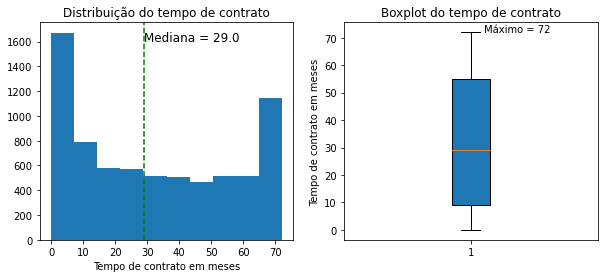

In [12]:
fig = plt.figure( figsize=(10,4))
gs = gridspec.GridSpec(1,2)

ax = fig.add_subplot(gs[0, 0])
ax.hist(clientes["tempo_contrato"])
ax. set_title('Distribuição do tempo de contrato')
ax.set_xlabel('Tempo de contrato em meses')
ax.axvline(clientes["tempo_contrato"].median(), color='g', linestyle='--')
ax.annotate(f'Mediana = {clientes["tempo_contrato"].median()}', xy=(clientes["tempo_contrato"].median(),1600), fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.boxplot(clientes["tempo_contrato"], patch_artist=True)
ax. set_title('Boxplot do tempo de contrato')
ax.set_ylabel('Tempo de contrato em meses')
ax.annotate(f'Máximo = {clientes["tempo_contrato"].max()}', xy=(1.05,clientes["tempo_contrato"].max()), fontsize=10)

plt.show();

In [13]:
clientes['tempo_contrato'].describe()

count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tempo_contrato, dtype: float64

In [14]:
print(f'Quantidade de clientes acima de 65 meses de contrato: {len(clientes[(clientes["tempo_contrato"] > 65)])},\
 o que representa {(len(clientes[(clientes["tempo_contrato"] > 65)])/len(clientes)):.2%} do total')

Quantidade de clientes acima de 65 meses de contrato: 1065, o que representa 14.66% do total


In [15]:
print(f'Quantidade de clientes abaixo de 5 meses de contrato: {len(clientes[(clientes["tempo_contrato"] <= 5)])},\
 o que representa {(len(clientes[(clientes["tempo_contrato"] <= 5)])/len(clientes)):.2%} do total')

Quantidade de clientes abaixo de 5 meses de contrato: 1421, o que representa 19.55% do total


Incialmente nenhuma inconsistência foi encontrada na coluna `tempo_contrato`. 

Pode-se notar que uma grande quantidade de clientes está nos extremos do tempo de contrato, uma grande parte próxima de 0 meses de contrato (poderiam ser novos clientes), a grande parte próxima de 70 meses de contrato (o que pode ser clientes fidelizados). Além disso, o maior contrato tem duaração de 72 meses e 50% dos contratos possuem menos que 30 meses.

Não existem outliers nessa coluna.


_______________________________
### Objeto Phone

In [16]:
telefone = pd.json_normalize(df.phone)
telefone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


#### Alterando os nomes das colunas

In [17]:
telefone.columns = ['telefone','multiplas_linhas']
telefone

,telefone,multiplas_linhas
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [18]:
lista = ['telefone','multiplas_linhas']
conta_valores(telefone, lista)

O campo telefone possui o valor Yes com 6560 ocorrências, 90.27%
O campo telefone possui o valor No com 707 ocorrências, 9.73%

O campo multiplas_linhas possui o valor No com 3495 ocorrências, 48.09%
O campo multiplas_linhas possui o valor Yes com 3065 ocorrências, 42.18%
O campo multiplas_linhas possui o valor No phone service com 707 ocorrências, 9.73%



In [19]:
# verificar as ocorrências da coluna telefone nos casos de multiplas_linhas igual a no phone service
telefone[telefone['multiplas_linhas'] == "No phone service"].telefone.value_counts()

No    707
Name: telefone, dtype: int64

O campo `telefone` é uma variável categórica, no campo `multiplas_linhas` temos uma variável categórica com 3 valores, sendo que a categoria “No phone service” representa os clientes que não possuem serviço telefônico, embora seja uma categoria feita para diferenciar clientes que possuem serviço telefônicos e não possuem múltiplas linhas dos clientes que não possuem serviço telefônico, aqui serão tratadas como uma única categoria, portanto iremos unir as duas categorias alterando essa categoria para “No”.

Além disso, como está sendo feito, alteraremos os valores para:
* Yes = 1
* No = 0
* No phone service = 0

In [20]:
telefone.replace(['Yes','No','No phone service'],[1,0,0], inplace=True)
lista = ['telefone','multiplas_linhas']
conta_valores(telefone, lista)

O campo telefone possui o valor 1 com 6560 ocorrências, 90.27%
O campo telefone possui o valor 0 com 707 ocorrências, 9.73%

O campo multiplas_linhas possui o valor 0 com 4202 ocorrências, 57.82%
O campo multiplas_linhas possui o valor 1 com 3065 ocorrências, 42.18%



A coluna `telefone` possui uma grande discrepância entre as classes, sendo que menos de 10% dos cliente não possuem uma linha telefônica. Já na coluna `multiplas_linhas` a distribuição se encontra mais equilibrada.

_______________
### Objeto internet

In [21]:
internet = pd.json_normalize(df.internet)
internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


#### Alterando o nome das colunas

In [22]:
internet.columns = ['tipo_internet','seguranca_online','backup','protecao_dispositivo','suporte_tecnico','assinatura_tv','assinatura_streaming']
internet

,tipo_internet,seguranca_online,backup,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [23]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tipo_internet         7267 non-null   object
 1   seguranca_online      7267 non-null   object
 2   backup                7267 non-null   object
 3   protecao_dispositivo  7267 non-null   object
 4   suporte_tecnico       7267 non-null   object
 5   assinatura_tv         7267 non-null   object
 6   assinatura_streaming  7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [24]:
lista = ['tipo_internet','seguranca_online','backup','protecao_dispositivo','suporte_tecnico','assinatura_tv','assinatura_streaming']
conta_valores(internet, lista)

O campo tipo_internet possui o valor Fiber optic com 3198 ocorrências, 44.01%
O campo tipo_internet possui o valor DSL com 2488 ocorrências, 34.24%
O campo tipo_internet possui o valor No com 1581 ocorrências, 21.76%

O campo seguranca_online possui o valor No com 3608 ocorrências, 49.65%
O campo seguranca_online possui o valor Yes com 2078 ocorrências, 28.60%
O campo seguranca_online possui o valor No internet service com 1581 ocorrências, 21.76%

O campo backup possui o valor No com 3182 ocorrências, 43.79%
O campo backup possui o valor Yes com 2504 ocorrências, 34.46%
O campo backup possui o valor No internet service com 1581 ocorrências, 21.76%

O campo protecao_dispositivo possui o valor No com 3195 ocorrências, 43.97%
O campo protecao_dispositivo possui o valor Yes com 2491 ocorrências, 34.28%
O campo protecao_dispositivo possui o valor No internet service com 1581 ocorrências, 21.76%

O campo suporte_tecnico possui o valor No com 3582 ocorrências, 49.29%
O campo suporte_tecnico 

Aqui todos os campos são categóricos, no campo `tipo_internet` existem 3 categorias, sendo uma para informar que o cliente não possui assinatura de internet. Assim como visto no dataset de telefones, os demais serviços dependem da assinatura da internet, por isso possuem uma categoria para informar os casos em que um plano de internet não foi contratado, assim como foi feito com o serviço telefônico, essa categoria será unida com a categoria “No”.

Será feita a alteração dos campos booleanos:
* Yes = 1
* No = 0
* No internet service = 0

In [25]:
internet.replace(['Yes','No','No internet service'],[1,0,0], inplace=True)
conta_valores(internet, lista)

O campo tipo_internet possui o valor Fiber optic com 3198 ocorrências, 44.01%
O campo tipo_internet possui o valor DSL com 2488 ocorrências, 34.24%
O campo tipo_internet possui o valor 0 com 1581 ocorrências, 21.76%

O campo seguranca_online possui o valor 0 com 5189 ocorrências, 71.40%
O campo seguranca_online possui o valor 1 com 2078 ocorrências, 28.60%

O campo backup possui o valor 0 com 4763 ocorrências, 65.54%
O campo backup possui o valor 1 com 2504 ocorrências, 34.46%

O campo protecao_dispositivo possui o valor 0 com 4776 ocorrências, 65.72%
O campo protecao_dispositivo possui o valor 1 com 2491 ocorrências, 34.28%

O campo suporte_tecnico possui o valor 0 com 5163 ocorrências, 71.05%
O campo suporte_tecnico possui o valor 1 com 2104 ocorrências, 28.95%

O campo assinatura_tv possui o valor 0 com 4477 ocorrências, 61.61%
O campo assinatura_tv possui o valor 1 com 2790 ocorrências, 38.39%

O campo assinatura_streaming possui o valor 0 com 4451 ocorrências, 61.25%
O campo assin

Nota-se que o campo ´tipo _internet´ possui uma distribuição mais equilibrada entre os campos, os demais são desbalanceados. O que leva a conclusão de que a maior parte dos clientes assinam poucos serviços adicionais, sendo os serviços de tv e streaming os mais procurados entre os adicionais. Vamos analisar este fato:

In [26]:
# Verificar os adicionais dos clientes que possuem pacote de internet
internet_assinantes = internet[internet["tipo_internet"] != 0]
conta_valores(internet_assinantes, lista)

O campo tipo_internet possui o valor Fiber optic com 3198 ocorrências, 56.24%
O campo tipo_internet possui o valor DSL com 2488 ocorrências, 43.76%

O campo seguranca_online possui o valor 0 com 3608 ocorrências, 63.45%
O campo seguranca_online possui o valor 1 com 2078 ocorrências, 36.55%

O campo backup possui o valor 0 com 3182 ocorrências, 55.96%
O campo backup possui o valor 1 com 2504 ocorrências, 44.04%

O campo protecao_dispositivo possui o valor 0 com 3195 ocorrências, 56.19%
O campo protecao_dispositivo possui o valor 1 com 2491 ocorrências, 43.81%

O campo suporte_tecnico possui o valor 0 com 3582 ocorrências, 63.00%
O campo suporte_tecnico possui o valor 1 com 2104 ocorrências, 37.00%

O campo assinatura_tv possui o valor 0 com 2896 ocorrências, 50.93%
O campo assinatura_tv possui o valor 1 com 2790 ocorrências, 49.07%

O campo assinatura_streaming possui o valor 0 com 2870 ocorrências, 50.47%
O campo assinatura_streaming possui o valor 1 com 2816 ocorrências, 49.53%



Podemos notar que a quantidade de clientes não assinantes do serviço de internet causa grande impacto na análise dos adicionais.

Quando olhamos apenas os assinantes verificamos que os adicionais são contratados por quase metade dos clientes, com exceção do suporte técnico e da segurança online, assinadas por pouco mais que um terço dos clientes.


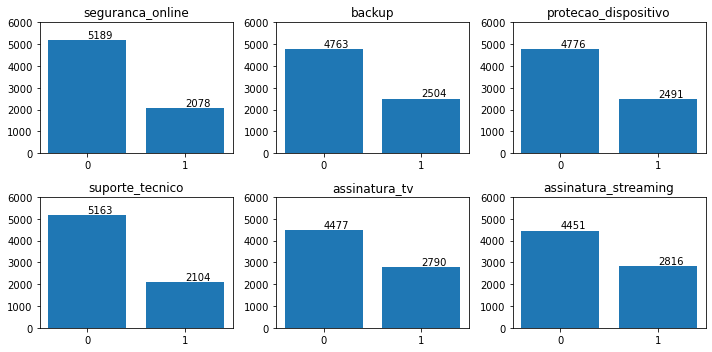

In [27]:
# Gráfico para comparação de cada adicional

fig = plt.figure(tight_layout=True, figsize=(10,5))
gs = gridspec.GridSpec(2,3) # gerar um layout 2 x 3

lista = ['seguranca_online','backup','protecao_dispositivo','suporte_tecnico','assinatura_tv','assinatura_streaming']

for i in range(6): #loop para gerar cada gráfico
    y = internet[lista[i]].value_counts() # quantidade de ocorrências de cada categoria
    x = ["0","1"] # labels
    # if para trocar a linha de plotagem
    if i < 3:
        ax = fig.add_subplot(gs[0, i])
    else:
        ax = fig.add_subplot(gs[1, i-3])
    ax.set_ylim(0,6000) # ajustando o eixo y para todos os gráficos ficarem com a mesma altura
    ax.bar(x, y) # plot do gráfico de barras
    ax. set_title(lista[i]) # alterando o título para o valor referente na lista
    ax.annotate(y[0], xy=(0,y[0]+100), fontsize=10) # acrescentando o valor da categoria 0
    ax.annotate(y[1], xy=(1,y[1]+100), fontsize=10) # acrescentando p valor da categoria 1

plt.show();

______________
### Objeto account

In [28]:
conta = pd.json_normalize(df.account)
conta

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


#### Alterando o nome das colunas

In [29]:
conta.columns = ['tipo_contrato','fatura_online','metodo_pagamento','valor_mensal','total_gasto']
conta

,tipo_contrato,fatura_online,metodo_pagamento,valor_mensal,total_gasto
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [30]:
conta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tipo_contrato     7267 non-null   object 
 1   fatura_online     7267 non-null   object 
 2   metodo_pagamento  7267 non-null   object 
 3   valor_mensal      7267 non-null   float64
 4   total_gasto       7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


Existem aqui 3 colunas com variáveis categóricas (`tipo_conta`, `fatura_online`, `metodo_pagamento`) e 2 com variáveis numéricas (`valor_mensal`, `total_gasto`). 

Inicialmente será feita a análise dos campo categóricos.

In [31]:
lista = ['tipo_contrato','fatura_online','metodo_pagamento']
conta_valores(conta,lista)

O campo tipo_contrato possui o valor Month-to-month com 4005 ocorrências, 55.11%
O campo tipo_contrato possui o valor Two year com 1743 ocorrências, 23.99%
O campo tipo_contrato possui o valor One year com 1519 ocorrências, 20.90%

O campo fatura_online possui o valor Yes com 4311 ocorrências, 59.32%
O campo fatura_online possui o valor No com 2956 ocorrências, 40.68%

O campo metodo_pagamento possui o valor Electronic check com 2445 ocorrências, 33.65%
O campo metodo_pagamento possui o valor Mailed check com 1665 ocorrências, 22.91%
O campo metodo_pagamento possui o valor Bank transfer (automatic) com 1589 ocorrências, 21.87%
O campo metodo_pagamento possui o valor Credit card (automatic) com 1568 ocorrências, 21.58%



Inicialmente não existe nenhuma inconsistência nos dados dessas colunas. Por enquanto a única alteração que será feita será na coluna `fatura_online`. Ademais, caso necessário, pode-se agrupar o campo `método pagamento` em automático e não automático.

Sobre a distribuição dos valores, pode-se notar que a coluna `tipo_contrato` é onde existe uma grande discrepância, o que indica que a maior parte dos não são fidelizados. As demais colunas estão com a distribuição bem equilibrada.

Será feita a alteração dos valores nos valores da coluna `fatura_online` para:
* Yes = 1
* No = 0

In [32]:
conta.replace(['Yes','No'],[1,0], inplace=True)
conta

,tipo_contrato,fatura_online,metodo_pagamento,valor_mensal,total_gasto
0,One year,1,Mailed check,65.60,593.3
1,Month-to-month,0,Mailed check,59.90,542.4
2,Month-to-month,1,Electronic check,73.90,280.85
3,Month-to-month,1,Electronic check,98.00,1237.85
4,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.9
7263,Month-to-month,1,Electronic check,85.10,1873.7
7264,Month-to-month,1,Mailed check,50.30,92.75
7265,Two year,0,Mailed check,67.85,4627.65


Agora uma análise das colunas com valores numéricos `valor_mensal` e `total_gasto`.

In [33]:
conta[['valor_mensal','total_gasto']].describe()

,valor_mensal
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


Aqui temos um problemas, não foi mostrado as estatísticas da coluna `total_gasto` no describe, o que significa que nem todos os dados aqui são numéricos, vamos analisar:

In [34]:
conta.dtypes

tipo_contrato        object
fatura_online         int64
metodo_pagamento     object
valor_mensal        float64
total_gasto          object
dtype: object

Realmente a coluna `total_gasto` é do tipo object, o que pode sugerir que possui algum caractere não numérico na coluna.
Vamos verificar se existe algum lançamento apenas com espaços.

In [35]:
# total de dados apenas com espaço
len(conta[conta['total_gasto'].str.isspace()])

11

Pode-se verificar que existem 11 registros onde o `total_gasto` não foi registrado e constam apenas com espaços.

Vamos verificar quem são esses clientes que estão sem lançamentos registrados:

In [36]:
clientes[conta['total_gasto'].str.isspace()]

,sexo,idoso,parceiro,dependentes,tempo_contrato
975,Female,0,1,1,0
1775,Female,0,1,1,0
1955,Male,0,0,1,0
2075,Male,0,1,1,0
2232,Male,0,0,1,0
2308,Male,0,1,1,0
2930,Female,0,1,1,0
3134,Male,0,1,1,0
3203,Female,0,1,1,0
4169,Female,0,1,1,0


As ocorrências onde não existem registros na coluna `total_gasto` são de clientes que ainda não possuem valor gasto pois ainda estão no primeiro mês de contrato, dessa forma esses valores serão substituídos por 0.

In [37]:
for i, row in conta.iterrows():
    if str(row.total_gasto).isspace():
        conta.loc[i,'total_gasto'] = 0
conta['total_gasto'] = conta['total_gasto'].astype(float)

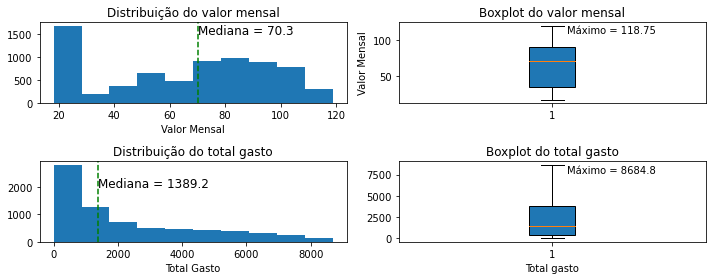

In [38]:
fig = plt.figure(tight_layout=True, figsize=(10,4))
gs = gridspec.GridSpec(2,2)

ax = fig.add_subplot(gs[0, 0])
ax.hist(conta["valor_mensal"])
ax. set_title('Distribuição do valor mensal')
ax.set_xlabel('Valor Mensal')
ax.axvline(conta["valor_mensal"].median(), color='g', linestyle='--')
ax.annotate(f'Mediana = {conta["valor_mensal"].median()}', xy=(conta["valor_mensal"].median(),1500), fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.boxplot(conta["valor_mensal"], patch_artist=True)
ax. set_title('Boxplot do valor mensal')
ax.set_ylabel('Valor Mensal')
ax.annotate(f'Máximo = {conta["valor_mensal"].max()}', xy=(1.05,conta["valor_mensal"].max()-10), fontsize=10)

ax = fig.add_subplot(gs[1, 0])
ax.hist(conta['total_gasto'])
ax. set_title('Distribuição do total gasto')
ax.set_xlabel('Total Gasto')
ax.axvline(conta['total_gasto'].median(), color='g', linestyle='--')
ax.annotate(f'Mediana = {conta["total_gasto"].median()}', xy=(conta["total_gasto"].median(),2000), fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.boxplot(conta['total_gasto'], patch_artist=True)
ax. set_title('Boxplot do total gasto')
ax.set_xlabel('Total gasto')
ax.annotate(f'Máximo = {conta["total_gasto"].max()}', xy=(1.05,conta["total_gasto"].max()-1000), fontsize=10)

plt.show();

In [39]:
conta[['valor_mensal','total_gasto']].describe()

,valor_mensal,total_gasto
count,7267.000000,7267.000000
mean,64.720098,2277.182035
std,30.129572,2268.648587
min,18.250000,0.000000
25%,35.425000,396.200000
50%,70.300000,1389.200000
75%,89.875000,3778.525000
max,118.750000,8684.800000


Tanto na coluna `valor_mensal` quanto na `total_gasto` não temos outliers.

O valor mensal possui valor mínimo de `18,25$` e máximo de `118,75$`, 50% dos clientes gastam mensalmente menos `70,30$` sendo que 25%, 1.816 clientes, gastam menos que 35,43 $.

Já na coluna total_gasto temos valor máximo de `8.684$`. 50% dos clientes gataram menos de `1.389,20$` sendo que 25% gastaram menos que `396,20$`. Como esse campo depende da quantidade de meses que o cliente é assinante, podemos ver pelo gráfico de Distribuição de gastos que a tendência é ter mais clientes com custo total menor o que pode ser por conta da uma baixa fidelização.


_____________
### Colunas customerID e Churn

In [40]:
churn = df[['customerID','Churn']]
churn

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


#### Alterando o nome das colunas

In [41]:
churn.columns = ['usuarioID', 'abandonou']
churn

,usuarioID,abandonou
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [42]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   usuarioID  7267 non-null   object
 1   abandonou  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [43]:
conta_valores(churn,['abandonou'])

O campo abandonou possui o valor No com 5174 ocorrências, 71.20%
O campo abandonou possui o valor Yes com 1869 ocorrências, 25.72%
O campo abandonou possui o valor  com 224 ocorrências, 3.08%



In [44]:
clientes[churn["abandonou"] == ""]

,sexo,idoso,parceiro,dependentes,tempo_contrato
30,Female,0,0,0,11
75,Male,0,0,0,71
96,Male,0,0,0,29
98,Female,1,0,0,5
175,Male,1,1,0,65
...,...,...,...,...,...
7158,Female,0,0,0,14
7180,Female,0,1,0,49
7211,Male,0,0,0,9
7239,Female,0,1,1,67


In [45]:
clientes[churn["abandonou"] == ""]["tempo_contrato"].min()

1

As colunas `usuarioID` e `abandonou` são categóricas.

A coluna ` abandonou `, que é o principal objeto da análise, possui duas categorias “Yes” para clientes que abandonaram a empresa e ‘No’ para clientes ativos, nesse campo ainda possuímos 224 valores em branco, analisando apenas os dados dos clientes não foi possível encontrar um alternativa para essa inconsistência.

Todos os dataframes serão unificados para verificar alguma possibilidade de contorno para esses valores em branco. 

Além disso, serão feitas as seguintes alterações na coluna `abandono`:
* Yes = 1
* No = 0

In [54]:
churn.replace(['Yes','No'],[1,0], inplace=True)
churn

,usuarioID,abandonou,sexo,idoso,parceiro,dependentes,tempo_contrato,telefone,multiplas_linhas,tipo_internet,...,backup,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,tipo_contrato,fatura_online,metodo_pagamento,valor_mensal,total_gasto
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


### Unindo os dataframes

In [47]:
churn = pd.concat([churn,clientes,telefone,internet,conta], axis=1)
churn

,usuarioID,abandonou,sexo,idoso,parceiro,dependentes,tempo_contrato,telefone,multiplas_linhas,tipo_internet,...,backup,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,tipo_contrato,fatura_online,metodo_pagamento,valor_mensal,total_gasto
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [48]:
branco = churn[churn["abandonou"] == ""]
branco.iloc[:,2:19].describe()

,idoso,parceiro,dependentes,tempo_contrato,telefone,multiplas_linhas,seguranca_online,backup,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,fatura_online
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,0.178571,0.517857,0.316964,31.571429,0.888393,0.419643,0.263393,0.334821,0.308036,0.267857,0.370536,0.375000,0.625000
std,0.383851,0.500800,0.466335,24.998552,0.315588,0.494606,0.441460,0.472985,0.462715,0.443835,0.484030,0.485207,0.485207
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
lista = ['idoso','parceiro','dependentes','tempo_contrato','telefone','tipo_internet','multiplas_linhas','seguranca_online','backup','protecao_dispositivo','suporte_tecnico','assinatura_tv','assinatura_streaming','tipo_contrato','fatura_online','metodo_pagamento']
conta_valores(branco, lista)

O campo idoso possui o valor 0 com 184 ocorrências, 82.14%
O campo idoso possui o valor 1 com 40 ocorrências, 17.86%

O campo parceiro possui o valor 1 com 116 ocorrências, 51.79%
O campo parceiro possui o valor 0 com 108 ocorrências, 48.21%

O campo dependentes possui o valor 0 com 153 ocorrências, 68.30%
O campo dependentes possui o valor 1 com 71 ocorrências, 31.70%

O campo tempo_contrato possui o valor 1 com 21 ocorrências, 9.38%
O campo tempo_contrato possui o valor 4 com 9 ocorrências, 4.02%
O campo tempo_contrato possui o valor 2 com 8 ocorrências, 3.57%
O campo tempo_contrato possui o valor 3 com 7 ocorrências, 3.12%
O campo tempo_contrato possui o valor 8 com 7 ocorrências, 3.12%
O campo tempo_contrato possui o valor 72 com 7 ocorrências, 3.12%
O campo tempo_contrato possui o valor 67 com 7 ocorrências, 3.12%
O campo tempo_contrato possui o valor 9 com 6 ocorrências, 2.68%
O campo tempo_contrato possui o valor 34 com 6 ocorrências, 2.68%
O campo tempo_contrato possui o valor 

In [50]:
branco[(branco["telefone"] == 0) & (branco["tipo_internet"] == 0)]

,usuarioID,abandonou,sexo,idoso,parceiro,dependentes,tempo_contrato,telefone,multiplas_linhas,tipo_internet,...,backup,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,tipo_contrato,fatura_online,metodo_pagamento,valor_mensal,total_gasto


Não foi possível encontrar nenhuma particularidade que pudesse explicar os valores em branco na coluna `abandonou`, dessa maneira os valores serão retirados em um primeiro momento e após os processamentos tentaremos estimá-los.

Os casos representam 3,08% do total de dados, ao retirá-los restarão 7043 registros.\

In [51]:
churn_sem_brancos = churn[(churn["abandonou"] == "") == False]
churn_sem_brancos.reset_index(inplace=True)

### Criar coluna de contas diárias

In [52]:
churn_sem_brancos['valor_diario'] = churn_sem_brancos['valor_mensal']/30
churn_sem_brancos

C:\Users\rhuan\AppData\Local\Temp/ipykernel_18604/1372281447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_sem_brancos['valor_diario'] = churn_sem_brancos['valor_mensal']/30


,index,usuarioID,abandonou,sexo,idoso,parceiro,dependentes,tempo_contrato,telefone,multiplas_linhas,...,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,tipo_contrato,fatura_online,metodo_pagamento,valor_mensal,total_gasto,valor_diario
0,0,0002-ORFBO,0,Female,0,1,1,9,1,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,1,0003-MKNFE,0,Male,0,0,0,9,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,2,0004-TLHLJ,1,Male,0,0,0,4,1,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,3,0011-IGKFF,1,Male,1,1,0,13,1,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,4,0013-EXCHZ,1,Female,1,1,0,3,1,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7262,9987-LUTYD,0,Female,0,0,0,13,1,0,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7039,7263,9992-RRAMN,1,Male,0,1,0,22,1,1,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7040,7264,9992-UJOEL,0,Male,0,0,0,2,1,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7041,7265,9993-LHIEB,0,Male,0,1,1,67,1,0,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667
